In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
from scipy.special import jv
import csv
import numpy as np
import pylab as plt

In [5]:
def importCSV(fname):
    data = []
    with open(fname, newline='') as csvfile:
        csvReader = csv.reader(csvfile)
        for row in csvReader:
            data.append(float(row[0]))
    return data

def get_axis_limits(ax):
    return ax.get_xlim()[1]*.6, ax.get_ylim()[1]*.6

In [6]:
c001M = 1000000*np.array(importCSV('EOM_centerband_001MHz_0_02_4.csv'))
c002M = 1000000*np.array(importCSV('EOM_centerband_002MHz_0_02_4.csv'))
c005M = 1000000*np.array(importCSV('EOM_centerband_005MHz_0_02_4.csv'))
c010M = 1000000*np.array(importCSV('EOM_centerband_010MHz_0_02_4.csv'))
c020M = 1000000*np.array(importCSV('EOM_centerband_020MHz_0_02_4.csv'))
c050M = 1000000*np.array(importCSV('EOM_centerband_050MHz_0_02_4.csv'))
c100M = 1000000*np.array(importCSV('EOM_centerband_100MHz_0_02_4.csv'))
c200M = 1000000*np.array(importCSV('EOM_centerband_200MHz_0_02_4.csv'))
c500M = 1000000*np.array(importCSV('EOM_centerband_500MHz_0_02_4.csv'))
c750M = 1000000*np.array(importCSV('EOM_centerband_750MHz_0_02_4.csv'))
c1000M = 1000000*np.array(importCSV('EOM_centerband_1000MHz_0_02_4.csv'))

s010M = 1000000*np.array(importCSV('EOM_sideband_010MHz_0_02_4_rev.csv'))
s020M = 1000000*np.array(importCSV('EOM_sideband_020MHz_0_02_4_rev.csv'))
s050M = 1000000*np.array(importCSV('EOM_sideband_050MHz_0_02_4_rev.csv'))
s100M = 1000000*np.array(importCSV('EOM_sideband_100MHz_0_02_4_rev.csv'))
s200M = 1000000*np.array(importCSV('EOM_sideband_200MHz_0_02_4_rev.csv'))
s500M = 1000000*np.array(importCSV('EOM_sideband_500MHz_0_02_4.csv'))
s1000M = 1000000*np.array(importCSV('EOM_sideband_1000MHz_0_02_4.csv'))

voltages = linspace(0,4,21)

In [7]:
#calculate the appropriate V_pi
from scipy.optimize import curve_fit

def appfunc(V, vpi):
    return jv(0,V*pi/vpi)**2

def appfuncside1(V, vpi):
    return jv(1,V*pi/vpi)**2

def appfunc2(f, a, b):
    return a*f+b

def optvpi(xdata, ydata):
    popt, pcov = curve_fit(appfunc, xdata, ydata)
    return [popt,pcov]

def optvpiside1(xdata, ydata):
    popt, pcov = curve_fit(appfuncside1, xdata, ydata)
    return [popt,pcov]

def optvpitrend(xdata, ydata):
    popt, pcov = curve_fit(appfunc2, xdata, ydata)
    return [popt,pcov]

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(-0.1, 4.7, 'Intensity of EOM centerbands and sidebands at different frequencies ')

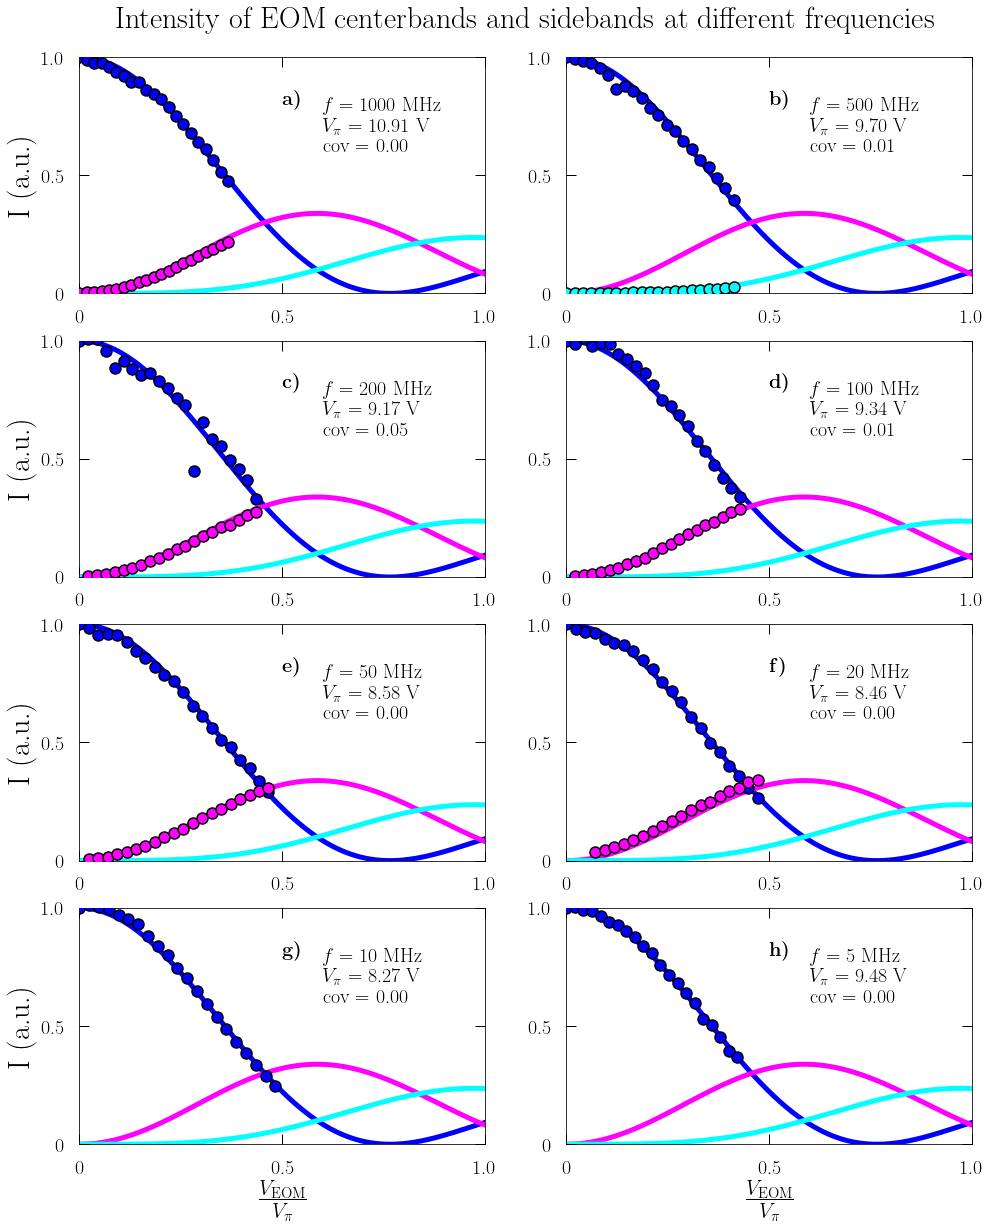

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15

vpis = []

#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,.5,1.0])
x_formatter = FixedFormatter([0,.5,1.0])
y_locator = FixedLocator([0,.5,1.00])
y_formatter = FixedFormatter([0,.5,1.00])


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,20))
fig.set_facecolor('w')
for i in range(0,len(axes)):
    for j in range(0,len(axes[0])):
        axes[i,j].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
        axes[i,j].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
        axes[i,j].xaxis.set_major_formatter(x_formatter)
        axes[i,j].xaxis.set_major_locator(x_locator)
        axes[i,j].yaxis.set_major_formatter(y_formatter)
        axes[i,j].yaxis.set_major_locator(y_locator)
        axes[i,j].set_xlim(-.00,1.0)
        axes[i,j].set_ylim(-.00,1.00)
        
    
#plot1
vpi, vcov = optvpi(voltages, c1000M/float(c1000M[0]))
vpis.append(vpi[0])

axes[0,0].plot(voltages/vpi, c1000M/float(c1000M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,0].plot(voltages/vpi, s1000M/float(c1000M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

V = linspace(0,vpi,1000)
axes[0,0].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[0,0].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[0,0].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[0,0].annotate(r'\textbf{a)}', xy=array(get_axis_limits(axes[0,0]))-[0.1, -0.2], fontsize = legfont)
axes[0,0].annotate('$f=1000$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[0,0]), fontsize = legfont)

#plot2
vpi, vcov = optvpi(voltages, c500M/float(c500M[0]))
vpis.append(vpi[0])

axes[0,1].plot(voltages/vpi, c500M/float(c500M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,1].plot(voltages/vpi, s500M/float(c500M[0]),'.',color='aqua',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[0,1].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[0,1].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[0,1].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[0,1].annotate(r'\textbf{b)}', xy=array(get_axis_limits(axes[0,1]))-[0.1, -0.2], fontsize = legfont)
axes[0,1].annotate('$f=500$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[0,1]), fontsize = legfont)

#plot3
vpi, vcov = optvpi(voltages, c200M/float(c200M[0]))
vpis.append(vpi[0])


offset = 1

axes[1,0].plot(voltages/vpi, c200M/float(c200M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1,0].plot(voltages[offset:21]/vpi, flip(s200M)[offset:21]/float(c200M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[1,0].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[1,0].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[1,0].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[1,0].annotate(r'\textbf{c)}', xy=array(get_axis_limits(axes[1,0]))-[0.1, -0.2], fontsize = legfont)
axes[1,0].annotate('$f=200$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot4
vpi, vcov = optvpi(voltages, c100M/float(c100M[0]))
vpis.append(vpi[0])

offset = 1

axes[1,1].plot(voltages/vpi, c100M/float(c100M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1,1].plot(voltages[offset:21]/vpi, flip(s200M)[offset:21]/float(c100M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

V = linspace(0,vpi,1000)
axes[1,1].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[1,1].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[1,1].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[1,1].annotate(r'\textbf{d)}', xy=array(get_axis_limits(axes[1,1]))-[0.1, -0.2], fontsize = legfont)
axes[1,1].annotate('$f=100$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot5
vpi, vcov = optvpi(voltages, c050M/float(c050M[0]))
vpis.append(vpi[0])

offset = 1

axes[2,0].plot(voltages/vpi, c050M/float(c050M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2,0].plot(voltages[offset:21]/vpi, flip(s050M)[offset:21]/float(c050M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[2,0].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[2,0].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[2,0].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[2,0].annotate(r'\textbf{e)}', xy=array(get_axis_limits(axes[2,0]))-[0.1, -0.2], fontsize = legfont)
axes[2,0].annotate('$f=50$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot6
vpi, vcov = optvpi(voltages, c020M/float(c020M[0]))
vpis.append(vpi[0])

offset = 3

axes[2,1].plot(voltages/vpi, c020M/float(c020M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2,1].plot(voltages[offset:21]/vpi, flip(s020M)[offset:21]/float(c020M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[2,1].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[2,1].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[2,1].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[2,1].annotate(r'\textbf{f)}', xy=array(get_axis_limits(axes[2,1]))-[0.1, -0.2], fontsize = legfont)
axes[2,1].annotate('$f=20$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot7
vpi, vcov = optvpi(voltages, c010M/float(c010M[0]))
vpis.append(vpi[0])

offset = 3

axes[3,0].plot(voltages/vpi, c010M/float(c010M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[3,0].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[3,0].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[3,0].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[3,0].annotate(r'\textbf{g)}', xy=array(get_axis_limits(axes[3,0]))-[0.1, -0.2], fontsize = legfont)
axes[3,0].annotate('$f=10$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot8
vpi, vcov = optvpi(voltages, c005M/float(c005M[0]))
vpis.append(vpi[0])

offset = 3

axes[3,1].plot(voltages/vpi, c005M/float(c005M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[3,1].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[3,1].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[3,1].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[3,1].annotate(r'\textbf{h)}', xy=array(get_axis_limits(axes[3,1]))-[0.1, -0.2], fontsize = legfont)
axes[3,1].annotate('$f=5$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#labels
axes[3,0].set_xlabel(r'$\frac{V_\text{EOM}}{V_\pi}$', fontsize = labelfont)
axes[3,1].set_xlabel(r'$\frac{V_\text{EOM}}{V_\pi}$', fontsize = labelfont)
axes[0,0].set_ylabel('I (a.u.)', fontsize = labelfont)
axes[1,0].set_ylabel('I (a.u.)', fontsize = labelfont)
axes[2,0].set_ylabel('I (a.u.)', fontsize = labelfont)
axes[3,0].set_ylabel('I (a.u.)', fontsize = labelfont)

plt.title('Intensity of EOM centerbands and sidebands at different frequencies ', fontsize = 30, y=4.7, x=-0.1)


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  


Text(0.5, 1.08, 'Measured and linearly fit  $V_\\pi$ at different frequencies')

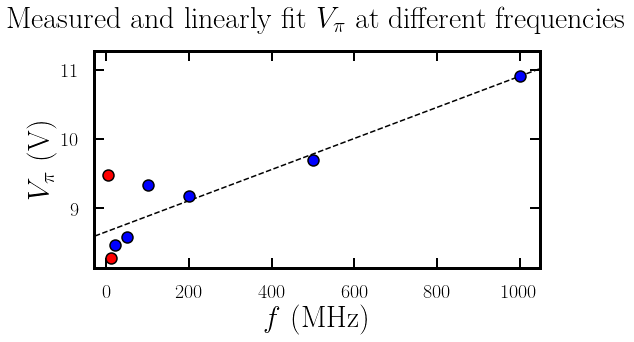

In [9]:
xdata = [1000, 500, 200, 100, 50 ,20]
ydata = vpis[0:6]

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 2.0 #line width
#msize = 14 #marker size
axew = 2.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15

#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,.5,1.0])
x_formatter = FixedFormatter([0,.5,1.0])
y_locator = FixedLocator([0,.5,1.00])
y_formatter = FixedFormatter([0,.5,1.00])


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
fig.set_facecolor('w')
axes.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
axes.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
axes.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
#axes.xaxis.set_major_formatter(x_formatter)
#axes.xaxis.set_major_locator(x_locator)
#axes.yaxis.set_major_formatter(y_formatter)
#axes.yaxis.set_major_locator(y_locator)
axes.set_xlim(-30,1050)
#axes.set_ylim(0,1.0)
        
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(3)
    
axes.set_xlabel('$f$ (MHz)', fontsize = labelfont)
axes.set_ylabel('$V_\pi$ (V)', fontsize = labelfont)

vpit, vcovt = optvpitrend(xdata, ydata)

plot(linspace(-100,1100, 1000), appfunc2(linspace(-100,1100, 1000), vpit[0], vpit[1]),'--',color='black',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

plot(xdata, ydata, '.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
plot([10, 5], vpis[6:8], '.',color='red',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

plt.title('Measured and linearly fit  $V_\pi$ at different frequencies', fontsize = 30, y=1.08, x=0.5)

Text(-0.1, 4.7, 'Intensity of EOM centerbands and sidebands at different frequencies ')

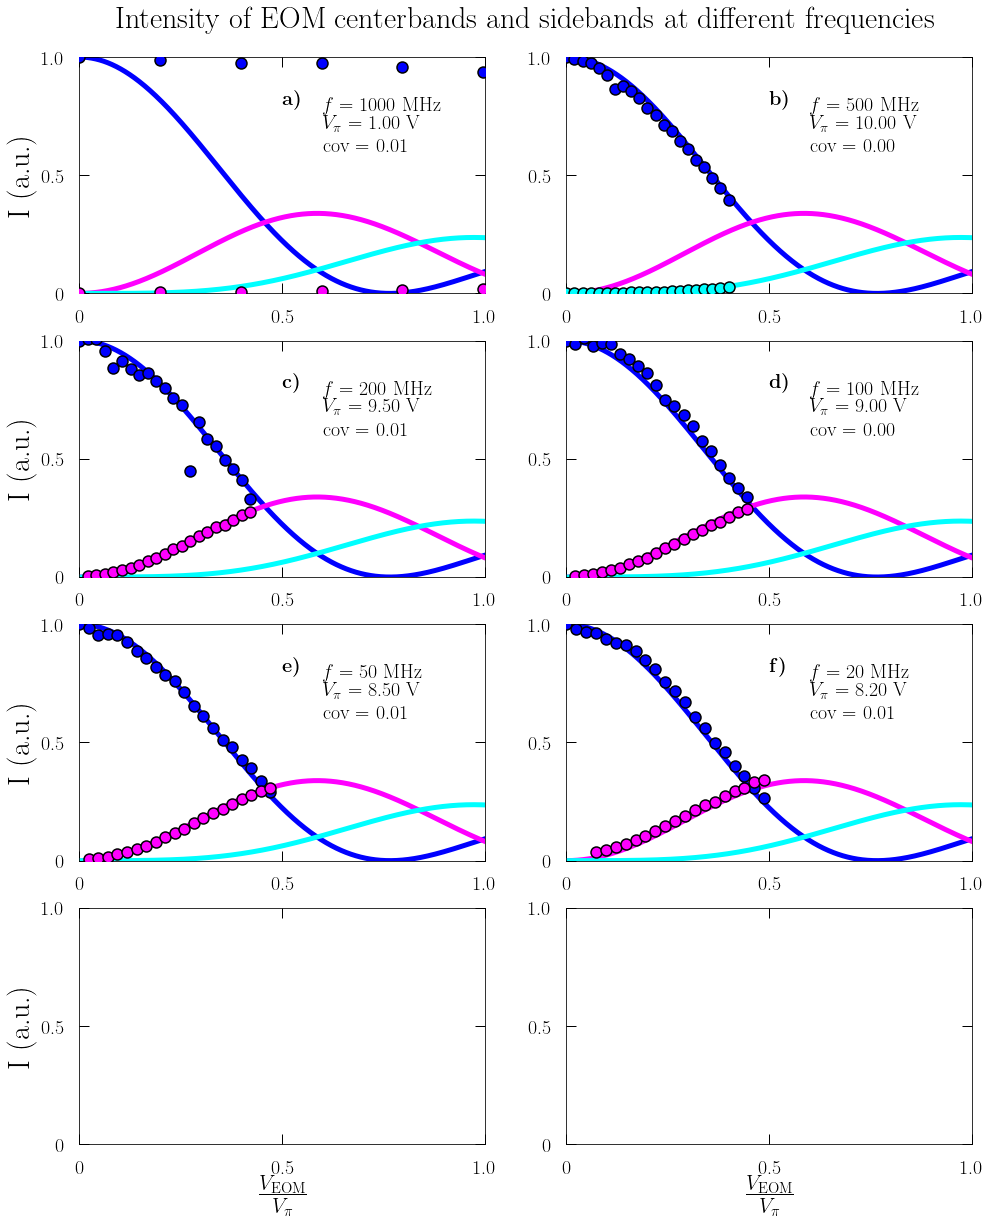

In [23]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15

vpis = []

#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 20 #axis label font size
numsize = 20 #axis number font size
legfont = 20 #legend font size
labelfont=30

#format axis labels
x_locator = FixedLocator([0,.5,1.0])
x_formatter = FixedFormatter([0,.5,1.0])
y_locator = FixedLocator([0,.5,1.00])
y_formatter = FixedFormatter([0,.5,1.00])


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,20))
fig.set_facecolor('w')
for i in range(0,len(axes)):
    for j in range(0,len(axes[0])):
        axes[i,j].tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
        axes[i,j].tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
        axes[i,j].tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
        axes[i,j].xaxis.set_major_formatter(x_formatter)
        axes[i,j].xaxis.set_major_locator(x_locator)
        axes[i,j].yaxis.set_major_formatter(y_formatter)
        axes[i,j].yaxis.set_major_locator(y_locator)
        axes[i,j].set_xlim(-.00,1.0)
        axes[i,j].set_ylim(-.00,1.00)
        
    
#plot1
vpi, vcov = optvpiside1(voltages, s1000M/float(c1000M[0]))
vpis.append(vpi[0])
#vpi = [10.5]

axes[0,0].plot(voltages/vpi, c1000M/float(c1000M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,0].plot(voltages/vpi, s1000M/float(c1000M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

V = linspace(0,vpi,1000)
axes[0,0].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[0,0].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[0,0].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[0,0].annotate(r'\textbf{a)}', xy=array(get_axis_limits(axes[0,0]))-[0.1, -0.2], fontsize = legfont)
axes[0,0].annotate('$f=1000$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[0,0]), fontsize = legfont)

#plot2
vpi, vcov = optvpiside1(voltages, s500M/float(c500M[0]))
vpis.append(vpi[0])
vpi = [10]

axes[0,1].plot(voltages/vpi, c500M/float(c500M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[0,1].plot(voltages/vpi, s500M/float(c500M[0]),'.',color='aqua',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[0,1].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[0,1].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[0,1].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[0,1].annotate(r'\textbf{b)}', xy=array(get_axis_limits(axes[0,1]))-[0.1, -0.2], fontsize = legfont)
axes[0,1].annotate('$f=500$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[0,1]), fontsize = legfont)

#plot3
offset = 1
vpi, vcov = optvpiside1(voltages[offset:21], flip(s200M)[offset:21]/float(c200M[0]))
vpis.append(vpi[0])
vpi = [9.5]

axes[1,0].plot(voltages/vpi, c200M/float(c200M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1,0].plot(voltages[offset:21]/vpi, flip(s200M)[offset:21]/float(c200M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[1,0].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[1,0].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[1,0].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[1,0].annotate(r'\textbf{c)}', xy=array(get_axis_limits(axes[1,0]))-[0.1, -0.2], fontsize = legfont)
axes[1,0].annotate('$f=200$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot4
offset = 1

vpi, vcov = optvpiside1(voltages[offset:21], flip(s100M)[offset:21]/float(c100M[0]))
vpis.append(vpi[0])
vpi = [9]


axes[1,1].plot(voltages/vpi, c100M/float(c100M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[1,1].plot(voltages[offset:21]/vpi, flip(s200M)[offset:21]/float(c100M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)

V = linspace(0,vpi,1000)
axes[1,1].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[1,1].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[1,1].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[1,1].annotate(r'\textbf{d)}', xy=array(get_axis_limits(axes[1,1]))-[0.1, -0.2], fontsize = legfont)
axes[1,1].annotate('$f=100$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot5
offset = 1
vpi, vcov = optvpiside1(voltages[offset:21], flip(s050M)[offset:21]/float(c050M[0]))
vpis.append(vpi[0])
vpi = [8.5]


axes[2,0].plot(voltages/vpi, c050M/float(c050M[0]),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2,0].plot(voltages[offset:21]/vpi, flip(s050M)[offset:21]/float(c050M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[2,0].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[2,0].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[2,0].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[2,0].annotate(r'\textbf{e)}', xy=array(get_axis_limits(axes[2,0]))-[0.1, -0.2], fontsize = legfont)
axes[2,0].annotate('$f=50$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)

#plot6
offset = 3
vpi, vcov = optvpiside1(voltages[offset:21], flip(s020M)[offset:21]/float(c020M[0]))
vpis.append(vpi[0])
vpi = [8.2]

axes[2,1].plot(voltages/vpi, c020M/float(max(c020M),'.',color='blue',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)
axes[2,1].plot(voltages[offset:21]/vpi, flip(s020M)[offset:21]/float(c020M[0]),'.',color='magenta',markeredgewidth=1.5, markeredgecolor='k',markersize=22,zorder=3)


V = linspace(0,vpi,1000)
axes[2,1].plot(V/vpi,jv(0,V*pi/vpi)**2,lw=5,color='blue')
axes[2,1].plot(V/vpi,jv(1,V*pi/vpi)**2,lw=5,color='magenta')
axes[2,1].plot(V/vpi,jv(2,V*pi/vpi)**2,lw=5, color='aqua')

axes[2,1].annotate(r'\textbf{f)}', xy=array(get_axis_limits(axes[2,1]))-[0.1, -0.2], fontsize = legfont)
axes[2,1].annotate('$f=20$ MHz\n$V_\pi=$ %.2f V\n cov = %.2f' %(vpi[0], vcov[0]), xy=get_axis_limits(axes[1,0]), fontsize = legfont)


#labels
axes[3,0].set_xlabel(r'$\frac{V_\text{EOM}}{V_\pi}$', fontsize = labelfont)
axes[3,1].set_xlabel(r'$\frac{V_\text{EOM}}{V_\pi}$', fontsize = labelfont)
axes[0,0].set_ylabel('I (a.u.)', fontsize = labelfont)
axes[1,0].set_ylabel('I (a.u.)', fontsize = labelfont)
axes[2,0].set_ylabel('I (a.u.)', fontsize = labelfont)
axes[3,0].set_ylabel('I (a.u.)', fontsize = labelfont)

plt.title('Intensity of EOM centerbands and sidebands at different frequencies ', fontsize = 30, y=4.7, x=-0.1)

In [379]:
vpi, vcov = optvpiside1(voltages, s1000M/float(c1000M[0]))
print(s1000M/float(c1000M[0]))
print(voltages)

[0.00317027 0.00392418 0.00644576 0.00940323 0.01451669 0.02049021
 0.02900172 0.03667895 0.04791591 0.05852248 0.06921577 0.08224784
 0.09421597 0.11073279 0.12849122 0.14306118 0.15717882 0.17403431
 0.18608075 0.20305524 0.21822042]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]


In [384]:
appfuncside1(voltages, 9.5)

array([0.        , 0.00109239, 0.00435524, 0.00974579, 0.01719342,
       0.02660063, 0.03784433, 0.05077756, 0.06523146, 0.08101759,
       0.09793047, 0.11575036, 0.13424624, 0.15317892, 0.17230425,
       0.19137638, 0.21015107, 0.22838891, 0.24585846, 0.26233932,
       0.27762497])